In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.io import arff
import matplotlib.pyplot as plt


In [40]:
arff_path = "zoo.arff"


In [41]:

data, meta = arff.loadarff(arff_path)

In [42]:
# декодируем данные
df = pd.DataFrame(data)
for col in df.columns:
    if df[col].dtype == object:  # если колонка строкового типа
        df[col] = df[col].str.decode('utf-8')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   animal    101 non-null    object 
 1   hair      101 non-null    object 
 2   feathers  101 non-null    object 
 3   eggs      101 non-null    object 
 4   milk      101 non-null    object 
 5   airborne  101 non-null    object 
 6   aquatic   101 non-null    object 
 7   predator  101 non-null    object 
 8   toothed   101 non-null    object 
 9   backbone  101 non-null    object 
 10  breathes  101 non-null    object 
 11  venomous  101 non-null    object 
 12  fins      101 non-null    object 
 13  legs      101 non-null    float64
 14  tail      101 non-null    object 
 15  domestic  101 non-null    object 
 16  catsize   101 non-null    object 
 17  type      101 non-null    object 
dtypes: float64(1), object(17)
memory usage: 14.3+ KB


In [44]:
df.head(15)

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,true,false,false,true,false,false,true,true,true,true,false,false,4.0,false,false,true,mammal
1,antelope,true,false,false,true,false,false,false,true,true,true,false,false,4.0,true,false,true,mammal
2,bass,false,false,true,false,false,true,true,true,true,false,false,true,0.0,true,false,false,fish
3,bear,true,false,false,true,false,false,true,true,true,true,false,false,4.0,false,false,true,mammal
4,boar,true,false,false,true,false,false,true,true,true,true,false,false,4.0,true,false,true,mammal
5,buffalo,true,false,false,true,false,false,false,true,true,true,false,false,4.0,true,false,true,mammal
6,calf,true,false,false,true,false,false,false,true,true,true,false,false,4.0,true,true,true,mammal
7,carp,false,false,true,false,false,true,false,true,true,false,false,true,0.0,true,true,false,fish
8,catfish,false,false,true,false,false,true,true,true,true,false,false,true,0.0,true,false,false,fish
9,cavy,true,false,false,true,false,false,false,true,true,true,false,false,4.0,false,true,false,mammal


In [45]:
# Приведём булевые столбцы к 0/1 и legs к int
bool_cols = ["hair","feathers","eggs","milk","airborne","aquatic","predator","toothed","backbone","breathes","venomous","fins","tail","domestic","catsize"]
for c in bool_cols:
    df[c] = df[c].astype(str).str.strip().str.lower().map({"true":1,"false":0})
df['legs'] = pd.to_numeric(df['legs'], errors='coerce').astype('Int64')  # nullable int
df.head(20)

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,mammal
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,mammal
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,fish
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,mammal
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,mammal
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,mammal
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,mammal
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,fish
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,fish
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,mammal


In [46]:
#проверка пропусков
missing = df.isnull().sum()
missing

animal      0
hair        0
feathers    0
eggs        0
milk        0
airborne    0
aquatic     0
predator    0
toothed     0
backbone    0
breathes    0
venomous    0
fins        0
legs        0
tail        0
domestic    0
catsize     0
type        0
dtype: int64

In [47]:
# проверм дубликаты (полные и по 'animal' так как он должен быть уникальным)
full_dups = df.duplicated(keep=False).sum()
animal_dups = df['animal'].duplicated(keep=False).sum()
print(f"There are {full_dups} duplications in the dataset.")
print(f"There are {animal_dups} duplications in the dataset.")

There are 0 duplications in the dataset.
There are 2 duplications in the dataset.


In [48]:
if animal_dups > 0:
    duplicates = df[df['animal'].duplicated(keep=False)].sort_values('animal')
duplicates

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,amphibian
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,amphibian


In [49]:
#из таблицы выше явно видны два дубликата!!

In [50]:
#баланс классов
type_counts = df['type'].value_counts()
type_counts

type
mammal          41
bird            20
fish            13
invertebrate    10
insect           8
reptile          5
amphibian        4
Name: count, dtype: int64

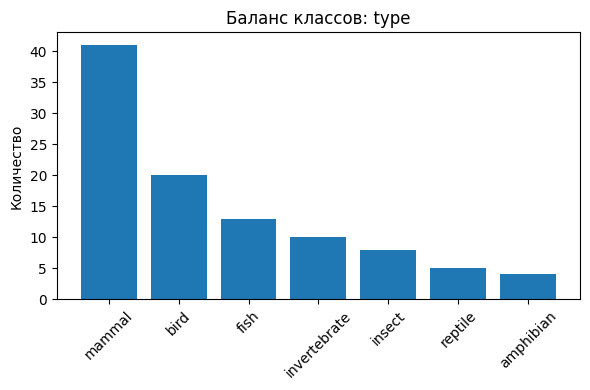

In [51]:
plt.figure(figsize = (6,4))
plt.bar(type_counts.index, type_counts.values)
plt.title('Баланс классов: type')
plt.ylabel('Количество')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [52]:
numeric_df = df.select_dtypes(include=[np.number])

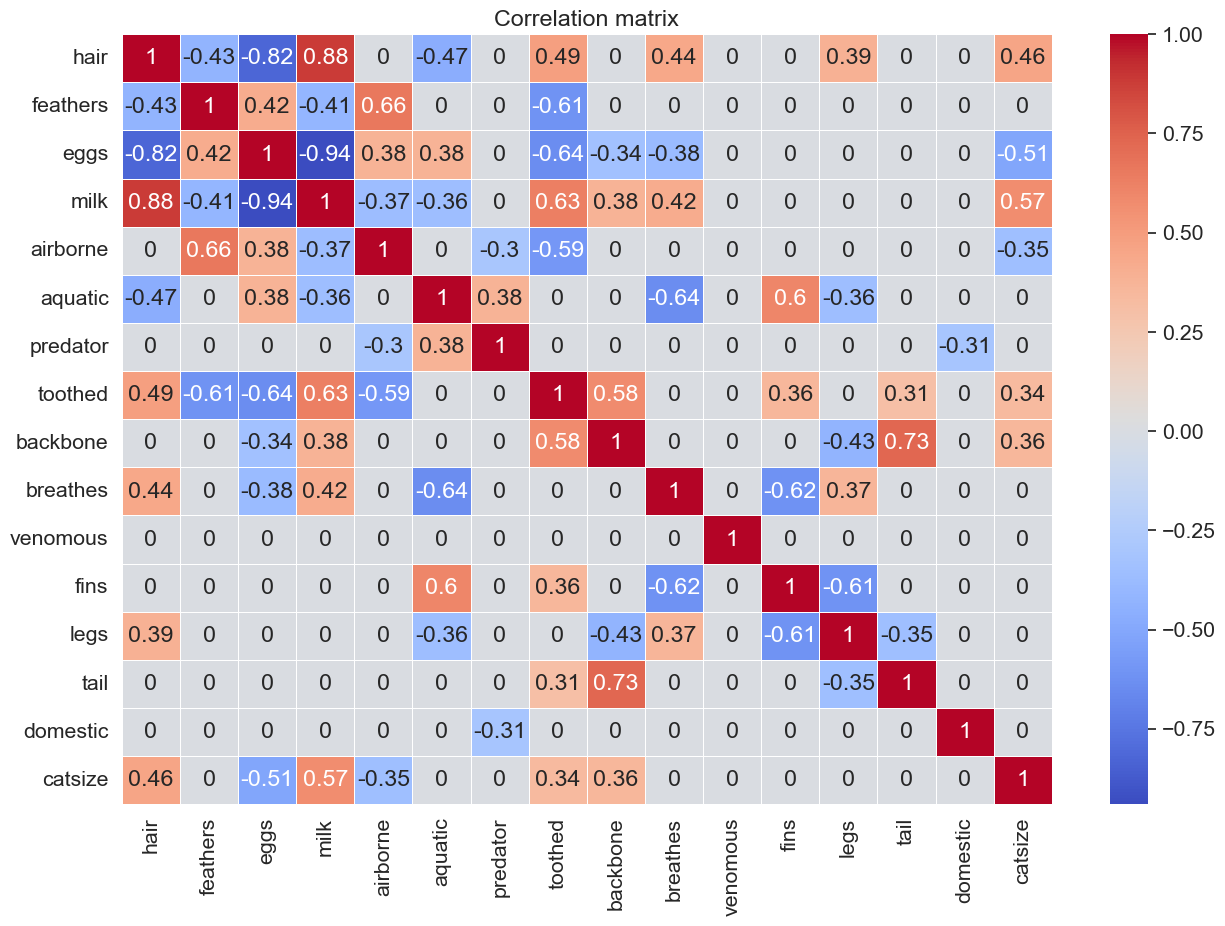

In [53]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = numeric_df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()